In [1]:
from sklearn.manifold import TSNE

In [2]:
filename = "answers/what_should_be_val/expconv3_10/repr_conv3.pkl"

In [6]:
import numpy as np
r = np.load(filename)
feat = r['feat']

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 40 / 40
[t-SNE] Mean sigma: 0.000003
[t-SNE] Error after 100 iterations with early exaggeration: 1.846008
[t-SNE] Error after 375 iterations: 1.738016


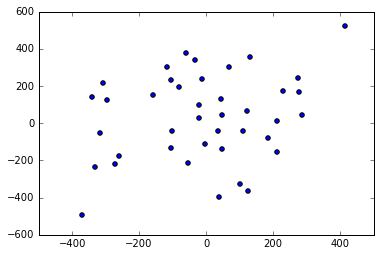

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
d=TSNE(perplexity=0.1, verbose=1).fit_transform(feat.reshape((feat.shape[0], -1)))
plt.scatter(d[:, 0], d[:, 1])
plt.show()

In [20]:
print(d)

[[ -60.53428051  378.94881471]
 [ 185.31964409  -80.56925475]
 [ 213.25794008   11.12381723]
 [ -11.72980882  237.89906012]
 [-118.13876295  300.59206335]
 [  69.49657034  303.8297992 ]
 [-105.26400394  232.78015245]
 [ 132.28381106  358.51522246]
 [-306.46644967  218.04424763]
 [ 277.00973516  166.01726009]
 [ 212.11364071 -152.76908765]
 [-102.22996061  -44.33898799]
 [-159.78769908  152.63334423]
 [  37.56910257 -398.03832605]
 [-315.453167    -50.89960608]
 [ 416.33128264  521.11424656]
 [-339.54978665  142.485381  ]
 [-271.09938488 -218.21584791]
 [ 126.64164757 -365.12798815]
 [-330.76417911 -237.00740872]
 [  44.07529565  132.33747932]
 [-295.01348342  126.34689679]
 [ 274.55678951  244.3931294 ]
 [-259.54537497 -175.04961457]
 [ 287.46309925   42.19094128]
 [ -54.03447387 -211.93015735]
 [  47.27525568 -139.21982624]
 [ 229.49929475  171.80958002]
 [ 100.16174869 -325.63937507]
 [  35.19646975  -41.36506817]
 [ -21.56312797   99.5294264 ]
 [ 121.80023528   63.0986648 ]
 [ -81.5